# ETAPA 02

Na etapa 01 desse projeto, foram encontradas diversas dificuldades em virtude da ausência de alguns dados que são de suma importância para uma análise coesa e mais próxima da realidade. Por isso, nessa **ETAPA 02**, será utilizado um **banco de dados mais robusto** retirado diretamente do site do INCA (<https://irhc.inca.gov.br/RHCNet/visualizaTabNetExterno.action>).

>**Obs.:** A conversão dos dados de .dbf para .csv, bem como a primeira filtragem dos dados da tabela para delimitar os dados que serão utilizados no projeto, estão na pasta **Data** dentro da pasta dessa etapa do projeto.

### Objetivo

O objetivo dessa etapa é respoder as seguintes perguntas pela **ANÁLISE EXPLORATÓRIA**:

> 01. Qual é a distribuição quantitativa de casos de câncer de 2000 a 2019 no Brasil?
> 02. Qual é a idade mais afetada pelo câncer na população total?
> 03. Qual é a o tipo de câncer mais comum na população total?

## Importando bibliotecas necessárias para o projeto

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## Importando a tabela com os dados filtrados no arquivo 'Data/filtro1_data_cancerINCA.csv'

In [2]:
dados = pd.read_csv('Data/filtro1_data_cancer_INCA.csv', sep = ',', encoding = 'utf-8', low_memory = False)

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083377 entries, 0 to 4083376
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Unnamed: 0              int64 
 1   sexo                    int64 
 2   idade                   object
 3   cor                     int64 
 4   local_residencia        object
 5   uso_alcool              int64 
 6   uso_tabaco              int64 
 7   ano_diagnostico         object
 8   data_primeiro_diagnost  object
 9   historico_familiar      int64 
 10  diagnost_trat_anterior  int64 
 11  local_hospital          object
 12  codigo_doenca           object
dtypes: int64(7), object(6)
memory usage: 405.0+ MB


In [4]:
dados.columns

Index(['Unnamed: 0', 'sexo', 'idade', 'cor', 'local_residencia', 'uso_alcool',
       'uso_tabaco', 'ano_diagnostico', 'data_primeiro_diagnost',
       'historico_familiar', 'diagnost_trat_anterior', 'local_hospital',
       'codigo_doenca'],
      dtype='object')

#### Retirando a coluna 'Unnamed: 0'

A coluna 'Unnamed: 0' não tem aplicação no projeto

In [3]:
dados1 = dados [['sexo', 'idade', 'cor', 'local_residencia', 'uso_alcool',
       'uso_tabaco', 'ano_diagnostico', 'data_primeiro_diagnost',
       'historico_familiar', 'diagnost_trat_anterior', 'local_hospital','codigo_doenca']]

In [23]:
dados1.head()

,sexo,idade,cor,local_residencia,uso_alcool,uso_tabaco,ano_diagnostico,data_primeiro_diagnost,historico_familiar,diagnost_trat_anterior,local_hospital,codigo_doenca
0,2,071,1,RJ,1,1,2002,10/03/2002,2,1,RJ,C44
1,1,000,9,99,9,9,2002,02/01/2002,9,9,RJ,C13
2,2,049,1,RJ,1,1,2002,21/07/2002,2,1,RJ,C49
3,1,066,1,RJ,9,3,2002,27/05/2002,1,1,RJ,C61
4,2,060,1,RJ,1,3,2002,21/08/2002,1,1,RJ,C73


## Avaliação dos dados nulo no DataFrame

In [24]:
dados1.isnull().sum()

sexo                       0
idade                      0
cor                        0
local_residencia           0
uso_alcool                 0
uso_tabaco                 0
ano_diagnostico           32
data_primeiro_diagnost     0
historico_familiar         0
diagnost_trat_anterior     0
local_hospital             0
codigo_doenca              3
dtype: int64

In [25]:
dados1.isna().mean()

sexo                      0.000000e+00
idade                     0.000000e+00
cor                       0.000000e+00
local_residencia          0.000000e+00
uso_alcool                0.000000e+00
uso_tabaco                0.000000e+00
ano_diagnostico           7.836651e-06
data_primeiro_diagnost    0.000000e+00
historico_familiar        0.000000e+00
diagnost_trat_anterior    0.000000e+00
local_hospital            0.000000e+00
codigo_doenca             7.346860e-07
dtype: float64

> **Aparentemente, a quantidade de dados nulos é insignificante**. No entanto, cabe analisar mais a fundo, a seguir,  cada coluna para certificarmos se os dados estão realmente preenchidos corretamente com os valores esperados em cada coluna.

In [26]:
''' 

DADOS ESPERADOS:

    1 (MASCULINO)
    2 (FEMININO)

'''

dados1.sexo.unique()

array([2, 1, 3, 0], dtype=int64)

In [27]:
''' 

DADOS ESPERADOS:

    VALORES ENTRE 0 E 100

'''

dados1.idade.unique()

array(['071', '000', '049', '066', '060', '046', '080', '047', '058',
       '055', '075', '076', '065', '068', '067', '038', '009', '048',
       '031', '069', '013', '019', '018', '010', '016', '002', '050',
       '090', '011', '033', '003', '083', '034', '039', '005', '054',
       '004', '079', '036', '024', '014', '059', '074', '015', '041',
       '025', '030', '026', '064', '035', '029', '057', '006', '078',
       '072', '032', '081', '008', '040', '037', '027', '053', '042',
       '028', '012', '045', '052', '044', '061', '023', '082', '017',
       '073', '062', '063', '056', '051', '021', '043', '020', '077',
       '070', '022', '001', '089', '087', '093', '094', '084', '085',
       '086', '007', '088', '096', '091', '092', '097', '999', '095',
       '100', '098', '099', '101', '-57', '-67', '102', '-55', '103',
       '104', '110', '119', '105', '-52', '125', '108', '106', '107',
       '-51', '122', '-59', '116', '109', '117', '128', '133', '135',
       '115', '118',

In [28]:
''' 

DADOS ESPERADOS:

    1 (BRANCA)
    2 (PRETA)
    3 (AMARELA)
    4 (PARDA)
    5 (INDÍGENA)
    9 (SEM INFORMAÇÃO)

'''

dados1.cor.unique()

array([ 1,  9,  2,  4,  3,  5, 99], dtype=int64)

In [29]:
''' 

DADOS ESPERADOS:

    SIGLAS DOS ESTADOS BRASILEIROS

'''

dados1.local_residencia.unique()

array(['RJ', '99', 'BA', 'SC', 'AL', 'PE', 'MG', 'SE', 'CE', 'GO', 'SP',
       'PR', 'AM', 'MA', 'ES', 'MS', 'RS', 'PB', 'DF', 'PA', 'RO', 'RR',
       'AC', 'MT', 'PI', 'RN', 'TO', 'AP', '77'], dtype=object)

In [30]:
''' 

DADOS ESPERADOS:

    1 (NUNCA)
    2 (EX-CONSUMIDOR)
    3 (SIM)
    4 (NÃO AVALIADO)
    8 (NÃO SE APLICA)
    9 (SEM INFORMAÇÃO)

'''

dados1.uso_alcool.unique()

array([1, 9, 3, 8, 0, 2, 4], dtype=int64)

In [41]:
''' 

DADOS ESPERADOS:

    1 (NUNCA)
    2 (EX-CONSUMIDOR)
    3 (SIM)
    4 (NÃO AVALIADO)
    8 (NÃO SE APLICA)
    9 (SEM INFORMAÇÃO)

'''

dados1.uso_tabaco.unique()
dados1.uso_tabaco.value_counts()

0    1214354
9    1072832
1     905874
3     485740
2     277410
4      79472
8      47695
Name: uso_tabaco, dtype: int64

In [32]:
''' 

DADOS ESPERADOS:

    ANOS

'''

dados1.ano_diagnostico.unique()

array(['2002', '2003', '2000', '1999', '1997', '1995', '1996', '1998',
       '1992', '1993', '1994', '9999', '2001', '1991', '2005', '1990',
       nan, '1985', '1989', '1981', '1979', '2004', '2006', '1952',
       '1984', '1986', '2007', '1987', '1971', '1980', '1988', '1982',
       '1930', '8888', '1955', '1977', '1983', '1962', '1924', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2017', '2015',
       '2016', '2018', '2019', '1978', '1922', '1934', '1966', '1970',
       '1959', '1976', '1975', '1932', '1919', '1973', '1926', '1939',
       '1957', '1949', '3/02', '2/01', '1974', '1925', '1969', '1933',
       '1967', '0/03', '5/03', '2/02', '8/03', '1963', '1950', '1940',
       '1935', '1961', '1943', '1958', '2/03', '1946', '1/01', '1945',
       '1964', '4/00', '1927', '1953', '1/06', '3/06', '1944', '1936',
       '0/07', '1956', '1972', '2/07', '1921', '4/08', '1899', '1928',
       '5/09', '1931', '1948', '2020', '1929', '1951', '1968', '1954',
       '1

In [33]:
# Ordenando os valores dos anos

anos_df = ['2002', '2003', '2000', '1999', '1997', '1995', '1996', '1998',
       '1992', '1993', '1994', '9999', '2001', '1991', '2005', '1990',
       '1985', '1989', '1981', '1979', '2004', '2006', '1952',
       '1984', '1986', '2007', '1987', '1971', '1980', '1988', '1982',
       '1930', '8888', '1955', '1977', '1983', '1962', '1924', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2017', '2015',
       '2016', '2018', '2019', '1978', '1922', '1934', '1966', '1970',
       '1959', '1976', '1975', '1932', '1919', '1973', '1926', '1939',
       '1957', '1949', '1974', '1925', '1969', '1933',
       '1967', '1963', '1950', '1940',
       '1935', '1961', '1943', '1958', '1946', '1945',
       '1964', '1927', '1953', '1944', '1936',
        '1956', '1972', '1921', '1899', '1928',
       '1931', '1948', '2020', '1929', '1951', '1968', '1954',
       '1965', '2021']

In [34]:
anos_float = [float(item) for item in anos_df]

In [35]:
# Visualização de quais anos aparecem no dataset

anos_float_ordenados = sorted(anos_float)

print(anos_float_ordenados)

[1899.0, 1919.0, 1921.0, 1922.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1939.0, 1940.0, 1943.0, 1944.0, 1945.0, 1946.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 8888.0, 9999.0]


In [36]:

''' 

DADOS ESPERADOS:

    DATAS

'''

dados1.data_primeiro_diagnost.unique()

array(['10/03/2002', '02/01/2002', '21/07/2002', ..., '01/02/2021',
       '04/12/1949', '24/09/2020'], dtype=object)

In [37]:
dados1.historico_familiar.unique()

''' 

DADOS ESPERADOS:

    1 (SIM)
    2 (NÃO)
    9 (SEM INFORMAÇÃO)

'''

' \n\nDADOS ESPERADOS:\n\n    1 (SIM)\n    2 (NÃO)\n    9 (SEM INFORMAÇÃO)\n\n'

In [38]:
''' 

DADOS ESPERADOS:

    1 (SEM DIAGNÓSTICO/SEM TRATAMENTO)
    2 (COM DIAGNÓSTICO/SEM TRATAMENTO)
    3 (COM DIAGNÓSTICO/COM TRATAMENTO)
    4 (OUTROS)
    9 (SEM INFORMAÇÃO)

'''

dados1.diagnost_trat_anterior.unique()

array([1, 9, 2, 3, 4, 0], dtype=int64)

In [39]:
''' 

DADOS ESPERADOS:

    SILGAS DOS ESTADOS BRASILEIROS

'''

dados1.local_hospital.unique()

array(['RJ', 'AL', 'MG', 'SC', 'ES', 'PR', 'PE', 'PA', 'AM', 'RS', 'PB',
       'MS', 'DF', 'CE', 'BA', 'PI', 'TO', 'SE', 'SP', 'RN', 'MT', 'MA',
       'RO', 'AC', 'RR', 'AP', 'GO'], dtype=object)

In [40]:
''' 

DADOS ESPERADOS:

    CÓDIGO COM UMA LETRA E 2 NÚMEROS

'''

dados1.codigo_doenca.unique()

array(['C44', 'C13', 'C49', 'C61', 'C73', 'C22', 'C34', 'C53', 'C42',
       'C77', 'C48', 'C16', 'C01', 'C50', 'C21', 'C18', 'C80', 'C67',
       'C71', 'C15', 'C56', 'C64', 'C05', 'C60', 'C32', 'C54', 'C10',
       'C11', 'C31', 'C02', 'C00', 'C09', 'C07', 'C04', 'C40', 'C20',
       'C19', 'C41', 'C52', 'C08', 'C06', 'C76', 'C51', 'C12', 'C23',
       'C38', 'C24', 'C74', 'C72', 'C30', 'C03', 'C14', 'C62', 'C55',
       'C25', 'C47', 'C75', 'C69', 'C70', 'C17', 'C65', 'C26', 'C33',
       'C63', 'C66', 'C68', 'C37', 'C58', 'C57', 'C39', 'C90', 'C81',
       'C83', 'C43', 'C85', 'C92', 'C82', 'C91', 'C93', 'C8', 'C45',
       'C78', 'C', 'C46', 'C99', 'C79', 'C84', 'C88', nan, 'C97', 'C96',
       'N62', 'E05', 'D46'], dtype=object)

## 01. Qual é a distribuição quantitativa de casos de câncer no Brasil?

In [42]:
dados1.columns

Index(['sexo', 'idade', 'cor', 'local_residencia', 'uso_alcool', 'uso_tabaco',
       'ano_diagnostico', 'data_primeiro_diagnost', 'historico_familiar',
       'diagnost_trat_anterior', 'local_hospital', 'codigo_doenca'],
      dtype='object')

In [5]:
# Conferindo se a data do diagnóstico coicinde com o ano do diagnóstico

data_ano_diagnostico = dados1[['ano_diagnostico', 'data_primeiro_diagnost']]

In [6]:
data_ano_diagnostico.query('ano_diagnostico == "1989"')

,ano_diagnostico,data_primeiro_diagnost
3395,1989,04/08/1989
3460,1989,15/08/1989
4146,1989,12/12/1989
4980,1989,14/02/1989
7076,1989,05/05/1989
...,...,...
3219006,1989,30/06/1989
3402788,1989,30/06/1989
3443016,1989,01/07/1989
3482695,1989,30/06/1989


In [7]:
gf_ano = dados1[['ano_diagnostico']]
gf_ano.head()

,ano_diagnostico
0,2002
1,2002
2,2002
3,2002
4,2002


In [15]:
# Retirando valores fora do esperado

gf_ano1 = gf_ano.drop(gf_ano.loc[
                     (gf_ano['ano_diagnostico'] == '3/02') | 
                     (gf_ano['ano_diagnostico'] == '2/01') | 
                     (gf_ano['ano_diagnostico'] == '0/03') |  
                     (gf_ano['ano_diagnostico'] == '5/03') | 
                     (gf_ano['ano_diagnostico'] == '2/02') |  
                     (gf_ano['ano_diagnostico'] == '8/03') |  
                     (gf_ano['ano_diagnostico'] == '2/03') |  
                     (gf_ano['ano_diagnostico'] == '1/01') |   
                     (gf_ano['ano_diagnostico'] == '4/00') | 
                     (gf_ano['ano_diagnostico'] == '1/06') | 
                     (gf_ano['ano_diagnostico'] == '3/06') | 
                     (gf_ano['ano_diagnostico'] == '0/07') | 
                     (gf_ano['ano_diagnostico'] == '2/07') | 
                     (gf_ano['ano_diagnostico'] == '4/08') | 
                     (gf_ano['ano_diagnostico'] == '5/09')].index
                     )

In [26]:
# Reirando valores 'nan'

gf_ano2 = gf_ano1.dropna()

In [27]:
type(gf_ano2)

pandas.core.frame.DataFrame

In [29]:
gf_ano3 = gf_ano2.sort_values(by= ['ano_diagnostico'])
type(gf_ano3)

pandas.core.frame.DataFrame

In [31]:
quantidade_ano = [[gf_ano3['ano_diagnostico'].value_counts()]]
quantidade_ano

[[2016    287242
  2015    285898
  2014    284851
  2017    284233
  2013    272712
           ...  
  1961         1
  1924         1
  1919         1
  1951         1
  1969         1
  Name: ano_diagnostico, Length: 98, dtype: int64]]

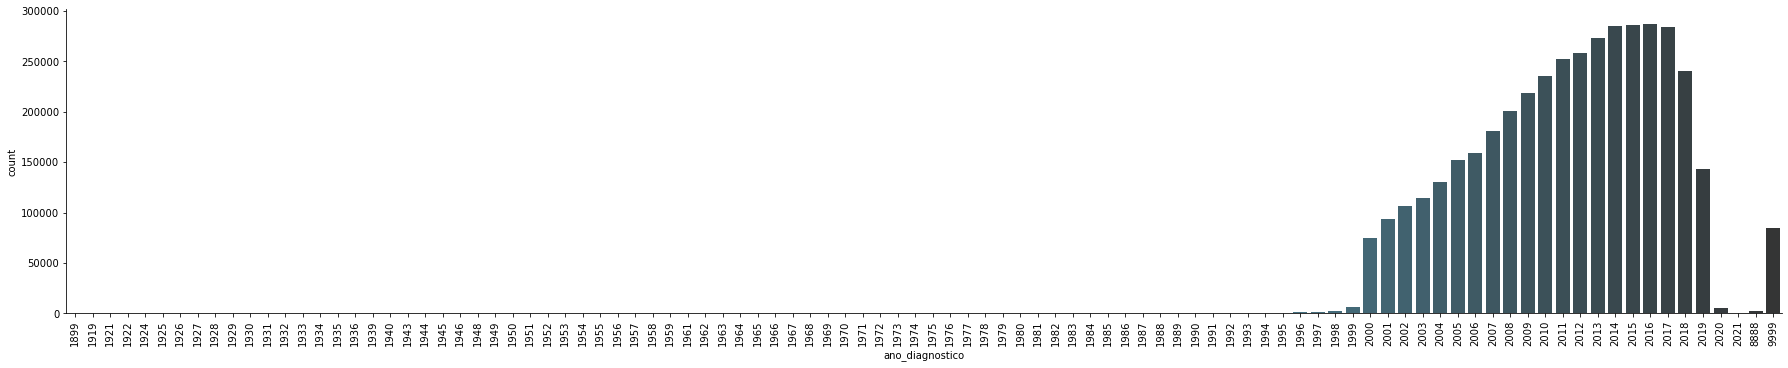

In [33]:
sns.catplot (x = 'ano_diagnostico', 
             kind = 'count',
             data = gf_ano3,
             aspect = 5,
             palette = "GnBu_d")

plt.xticks(rotation = 90)
plt.show()

In [ ]:
# PRÓXIMO PASSO: delimitar a análise nos anos de 2000 a 2019